## PREP

In [1]:
from __future__ import division
import math
import pandas as pd
from sympy import Symbol
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True,precision=3)
import copy
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
train_x = np.load('datagen_xtrain.npy')
train_y = np.load('datagen_ytrain.npy')
test_x = np.load('datagen_xtest.npy')
test_y = np.load('datagen_ytest.npy')

print(['a','b','c'],'y')
for x in zip(train_x[:10],train_y[:10]):
    print(x)

(['a', 'b', 'c'], 'y')
(array([ 0.249,  0.451, -0.269]), 0.073319416026783019)
(array([-0.478,  0.153,  0.077]), -0.3507951699949578)
(array([ 0.202,  0.384,  1.363]), 0.81398569301284773)
(array([ 0.625,  2.266,  0.349]), 0.67341727377121274)
(array([ 2.206, -1.388,  0.275]), 1.9206493606385207)
(array([ 1.383,  0.339, -0.923]), 0.6816054401320083)
(array([-0.326,  1.388, -1.083]), -0.78151494089516493)
(array([-1.081, -1.638, -0.063]), -0.90689975439840309)
(array([-1.292, -0.71 , -0.792]), -1.4259175010277014)
(array([ 0.295,  0.385, -0.155]), 0.16586475648167842)


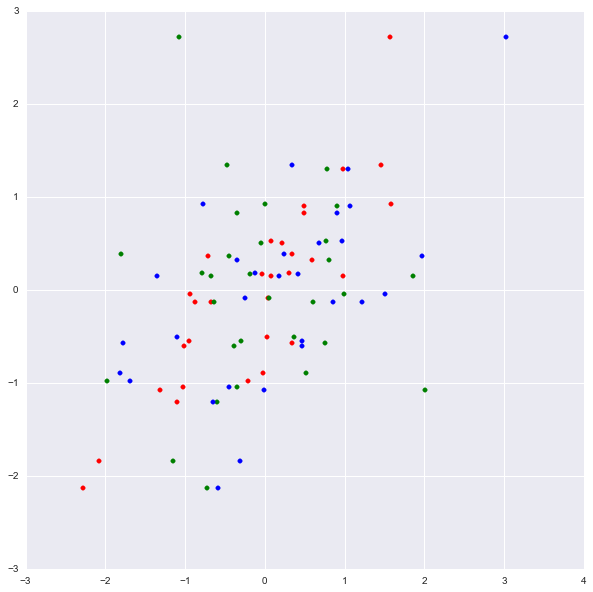

In [4]:
#X COLUMNS VS Y
plt.scatter(test_x[:,0],test_y,color='r')
plt.scatter(test_x[:,1],test_y,color='g')
plt.scatter(test_x[:,2],test_y,color='b')

plt.rcParams['figure.figsize']=(10,10)
plt.show()

----

## LARS ALGO AS A CLASS:

In [193]:
class LARS():
    
    #CLASS INITIAL ATTRIBUTES
    def __init__(self,train_x,train_y,steps,increment):
        self.steps = steps
        self.inc = increment
        self.rows = train_x.shape[0]
        self.cols = train_x.shape[1]
        self.beta_matrix = []
        self.beta_list = [0]*self.cols
        self.beta_matrix.append(self.beta_list)

    #RESIDUALS
    def residuals(self):
        residuals = []
        for r in range(self.rows):
            terms = []
            for c in range(self.cols):
                term = train_x[r,c] * self.beta_list[c]
                terms.append(term)
            residual = train_y[r] - sum(terms)
            residuals.append(residual)
        self.res = residuals
        
    #CORRELATIONS
    def correlations(self):
        corr = []
        for c in range(self.cols):
            x_res = []
            for r in range(self.rows):
                x_res.append(train_x[r][c] * self.res[r])
            corr.append(sum(x_res)/self.rows)
        self.corr = corr        

    #INCREMENT
    def increment_beta(self):
        best_cor_ix = 0
        best_cor = self.corr[0]
        for r in range(1, (self.cols)):
            if abs(best_cor) < abs(self.corr[r]):
                best_cor_ix = r
                best_cor = self.corr[r]
        new_list = []
        for x,y in enumerate(self.beta_list):
            if x == best_cor_ix:
                incrementor = self.inc * (best_cor / abs(best_cor))
                new_list.append(y+incrementor)
            else:
                new_list.append(y)
        self.beta_matrix.append(new_list)
    
    #FIND OPTIMUM BETA VALUES
    def best_func(self):
        self.mse_path = []
        for coefs in self.beta_matrix:
            predictions = []
            for y in range(self.rows):
                coef_vals = []
                for z in range(self.cols):
                    coef_val = coefs[z] * train_x[y][z]
                    coef_vals.append(coef_val)
                predictions.append(sum(coef_vals))
            squared_errors = [(predictions[x]-train_y[x])**2 for x in range(self.rows)]
            self.mse_path.append([coefs,sum(squared_errors)/self.rows])
        self.best_betas = sorted(self.mse_path, key = lambda x: x[1])[0][0]

    #STEP NUMBER OF OPTIMUM BETA VALUES
    def best_step(self):
        mins = []
        error_path = [x[1] for x in self.mse_path]
        minimum = min(error_path)
        for x, y in enumerate(error_path):
            if y==minimum:
                mins.append(x)
        self.best_step = min(mins)
        return self.best_step
    
    #CONTROL FUNCTION TO FIT OPTIMAL BETAS TO DATA SET
    #RETURNS THE OPTIMUM BETAS
    def fit(self):
        for x in range(self.steps):
            self.beta_list = self.beta_matrix[-1]
            self.residuals() 
            self.correlations()
            self.increment_beta()
            self.best_func()
        return self.best_betas
    
    #PLOT HOW BETAS CHANGE WITH EACH STEP
    def plot_coefs(self):
        plt.ylim(-.05,1)
        plt.xlim(-1,self.steps)
        for x in range(self.cols):
            value_list = [self.beta_matrix[y][x] for y in range(self.steps)]
            value_space = range(len(value_list))
            plt.plot(value_space,value_list)
    
    #PLOT THE ERROR AT EACH STEP GIVEN THE BETAS FOR THAT STEP
    def plot_error_path(self):
        self.mse_path = []
        for coefs in self.beta_matrix:
            predictions = []
            for y in range(self.rows):
                coef_vals = []
                for z in range(self.cols):
                    coef_val = coefs[z] * train_x[y][z]
                    coef_vals.append(coef_val)
                predictions.append(sum(coef_vals))
            squared_errors = [(predictions[x]-train_y[x])**2 for x in range(self.rows)]
            self.mse_path.append([sum(squared_errors)/self.rows])
        plt.plot(range(len(self.mse_path)),self.mse_path)
        
    #BASED ON OPTIMUM BETAS, PREDICT THE OUTPUT VALUES GIVEN A TEST DATA SET
    def predict(self,test_x):
        predictions = []
        for x in range(len(test_x)):
            beta_vals = []
            for y in range(self.cols):
                beta = self.best_betas[y] * test_x[x][y]
                beta_vals.append(beta)
            predictions.append(sum(beta_vals))
        return predictions

beta_model = LARS(train_x,train_y,350,.004)
beta_model.fit()

[0.81200000000000061, 0, 0.47600000000000037]


---

### LETS TEST IT OUT:

>#### A PLOT OF ERROR, BETAS, AND WHERE THEY STABILIZE

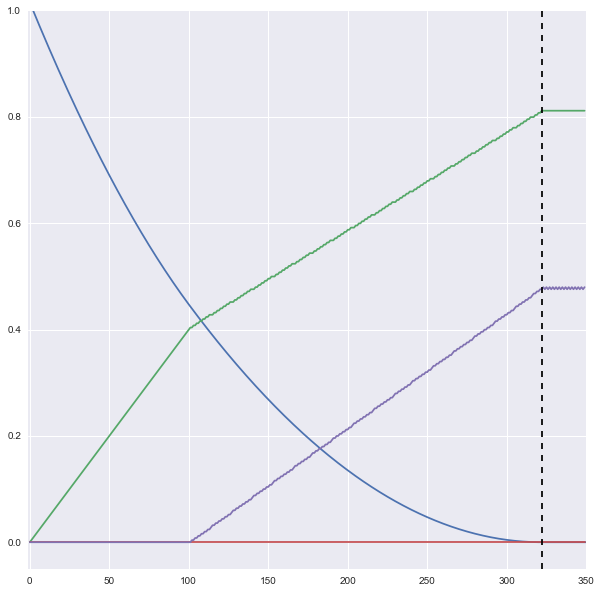

In [165]:
beta_model.plot_error_path()
beta_model.plot_coefs()
plt.axvline(beta_model.best_step,color='k',ls='dashed')
plt.show()

---

>#### Zooming-in on where the error finally levels out:

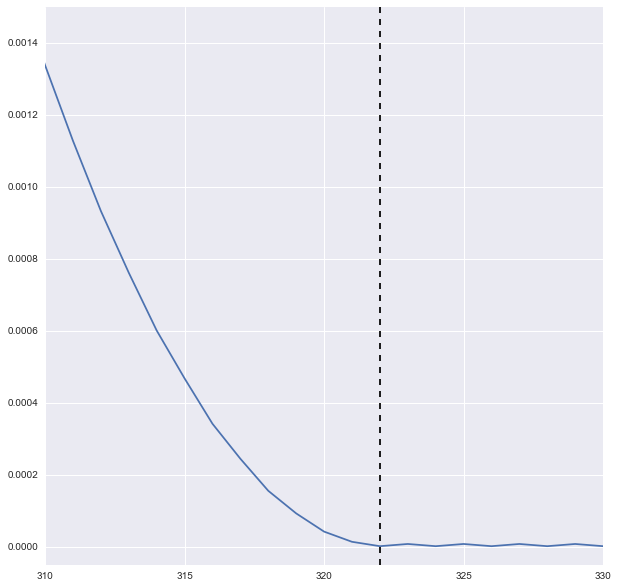

In [133]:
plt.plot(range(len(beta_model.mse_path)),beta_model.mse_path)
plt.axvline(beta_model.best_step,color='k',ls = 'dashed')
plt.ylim(-.00005,.0015)
plt.xlim(310,330)
plt.show()

>#### PREDICTION:

In [195]:
predict_y = beta_model.predict(test_x)
predict_y

[-0.13051510256702148,
 0.82555953837278317,
 -1.2033204006369891,
 -0.98101575838183785,
 0.38438532528451502,
 0.18479898615297274,
 0.15151496180213059,
 0.90026883509885525,
 0.15305398893385469,
 -0.13761151830536611,
 1.3400993194914186,
 0.50070103448886505,
 0.5230386155847746,
 0.16518880483477774,
 0.31943155743967322,
 -0.044301235838970388,
 -0.60502298414489131,
 -0.08861691388608961,
 -2.13201351038269,
 -1.0504684564768303,
 -1.8400441357502091,
 -0.54696722727004632,
 0.92051547010627965,
 1.2968641787109589,
 2.7148292581229971,
 0.35985761721128051,
 -0.50690231004766606,
 -0.57194835180044235,
 -0.88840467965452385,
 -1.0753646817967042]

---